In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb


In [44]:
df = pd.read_csv("Data/BTC_USDT_15m/data_processed.csv", index_col="Date")
del df["label"]
del df["action"]
l = df["close"].to_list()
l.pop(0)
l.append(0)
df["action"] = np.array(l) - np.array(df["close"].to_list())
df.drop(df.tail(1).index,inplace=True) # drop last n rows
df.drop(df.head(150).index,inplace=True) # drop last n rows


df["action"] = df["action"] > 0

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'action'], df["action"], test_size=0.2, random_state=42, shuffle=False)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=False)

In [46]:
np.any(np.isnan(X_train))


False

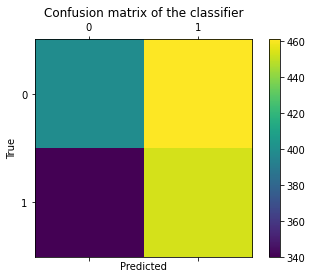

0.515426497277677


In [49]:
from sklearn.ensemble import RandomForestClassifier
 
 # create regressor object
cl = RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs=-1)
 
# fit the regressor with x and y data
cl.fit(X_train, y_train) 
y_pred = cl.predict(X_test)  # test the output by changing values
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))


/home/matejkalc/Documents/ft_matej/DQN-Trading/dqn-trading/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


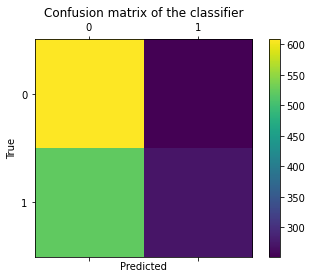

0.5323653962492438


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)

 # create regressor object
cl = LogisticRegression(random_state = 0, n_jobs=-1)
 
# fit the regressor with x and y data
cl.fit(X_poly, y_train) 
y_pred = cl.predict(poly.fit_transform(X_test))  # test the output by changing values
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

In [ ]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)